In [1]:
from cds_data_fetch import *
import pandas as pd
from pandas.tseries.offsets import MonthEnd, YearEnd

import numpy as np
import wrds

import config
from pathlib import Path
import cds_processing
import plot_interest_rates
from plot_interest_rates import plot_interest_rates
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import cds_processing
from cds_processing import calc_cds_monthly
import plot_cds
from plot_cds import cds_spread_plot
import calc_cds_returns
from calc_cds_returns import calc_cds_return 
from calc_cds_returns import calc_difference
from calc_cds_returns import *


### Interest rates

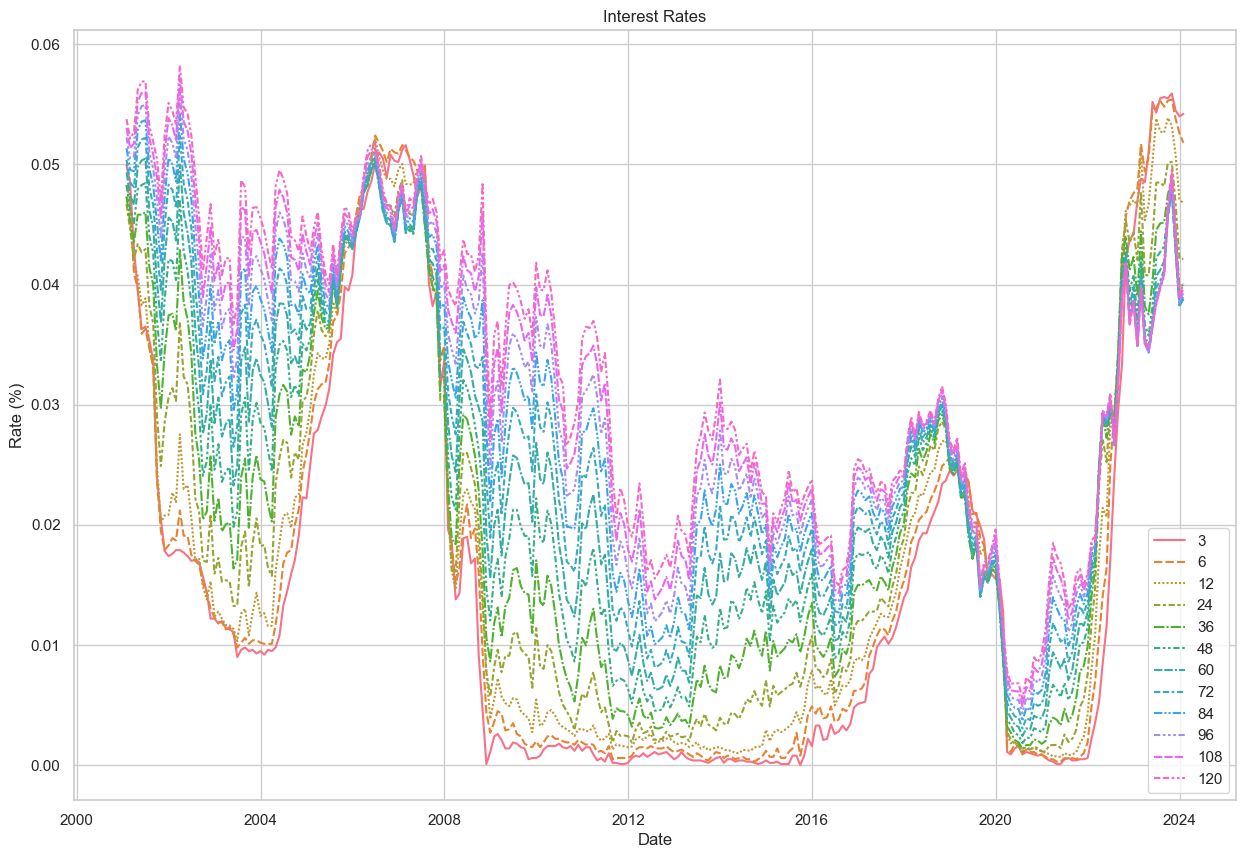

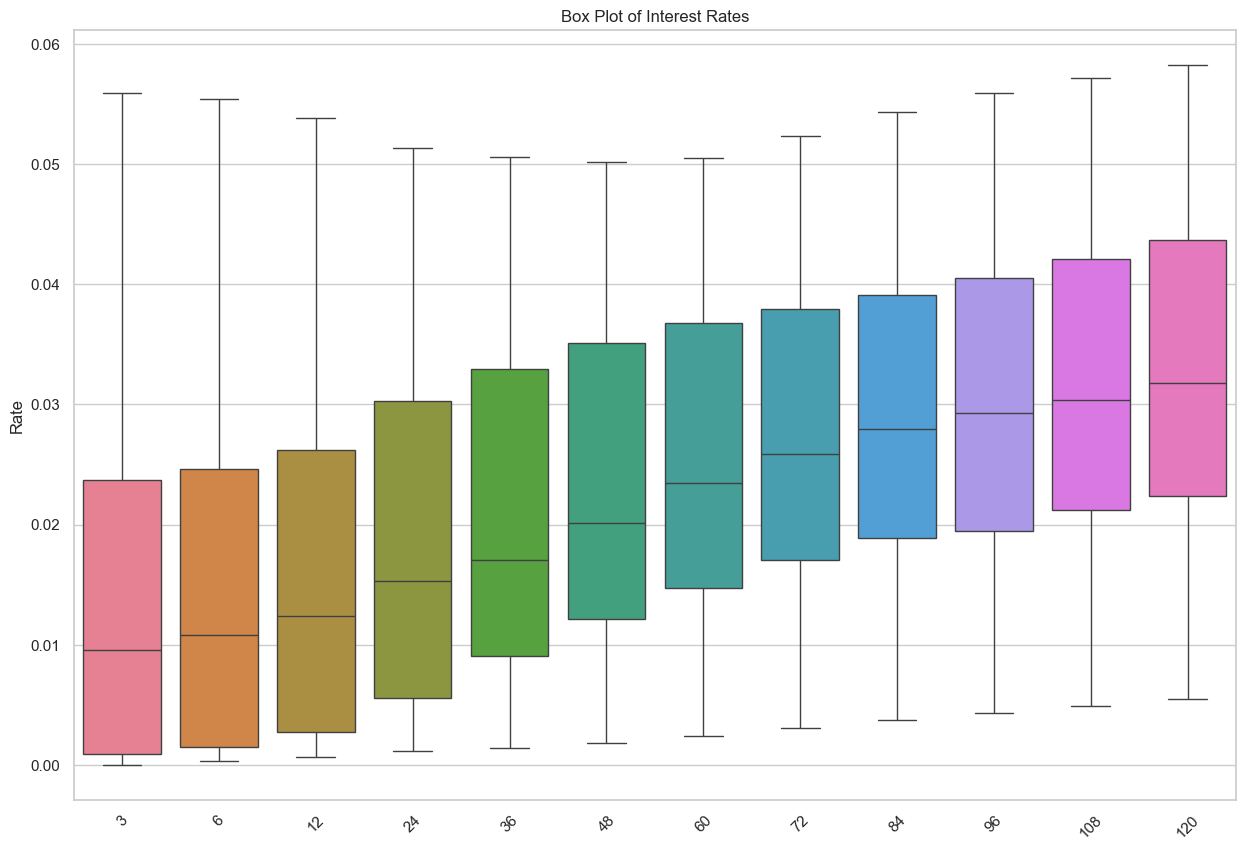

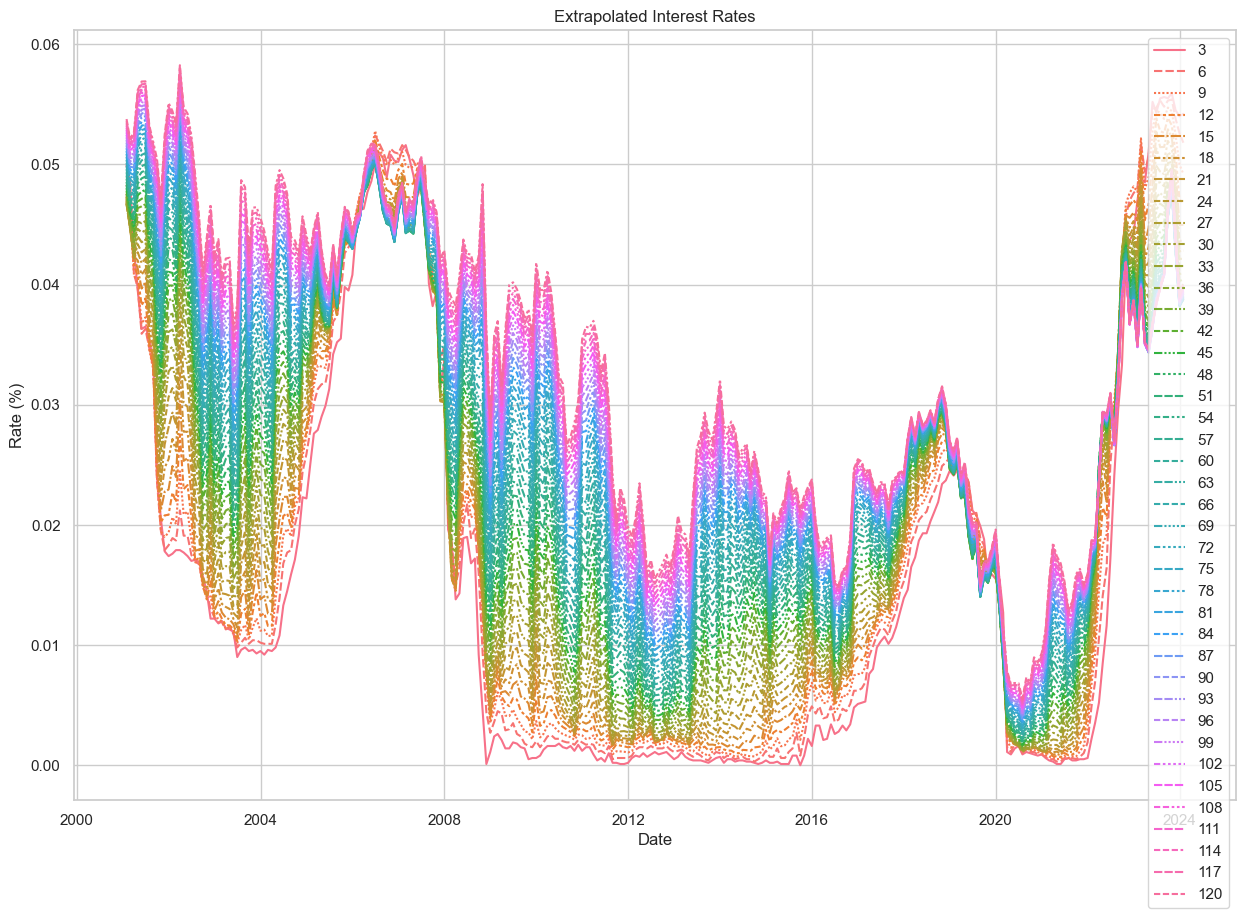

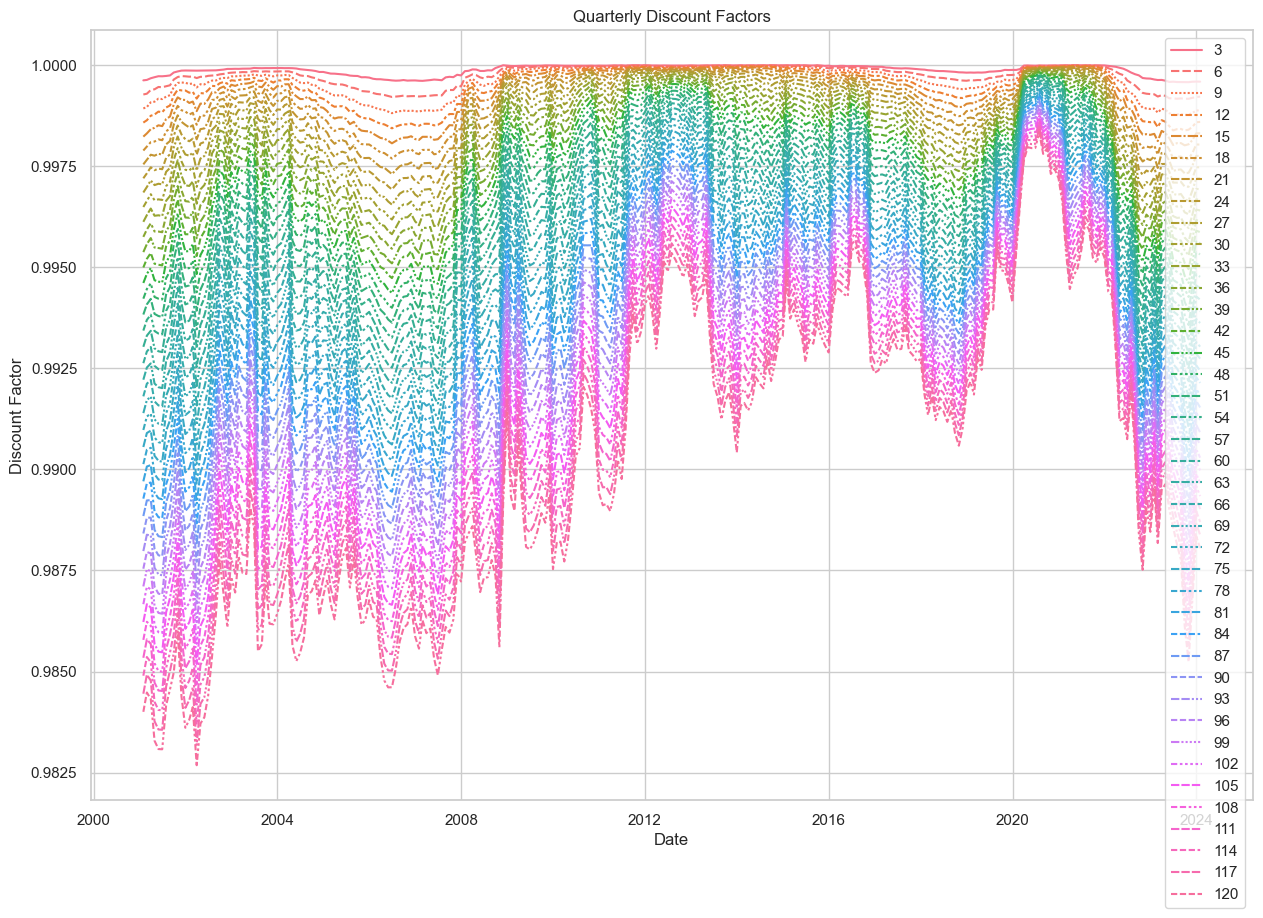

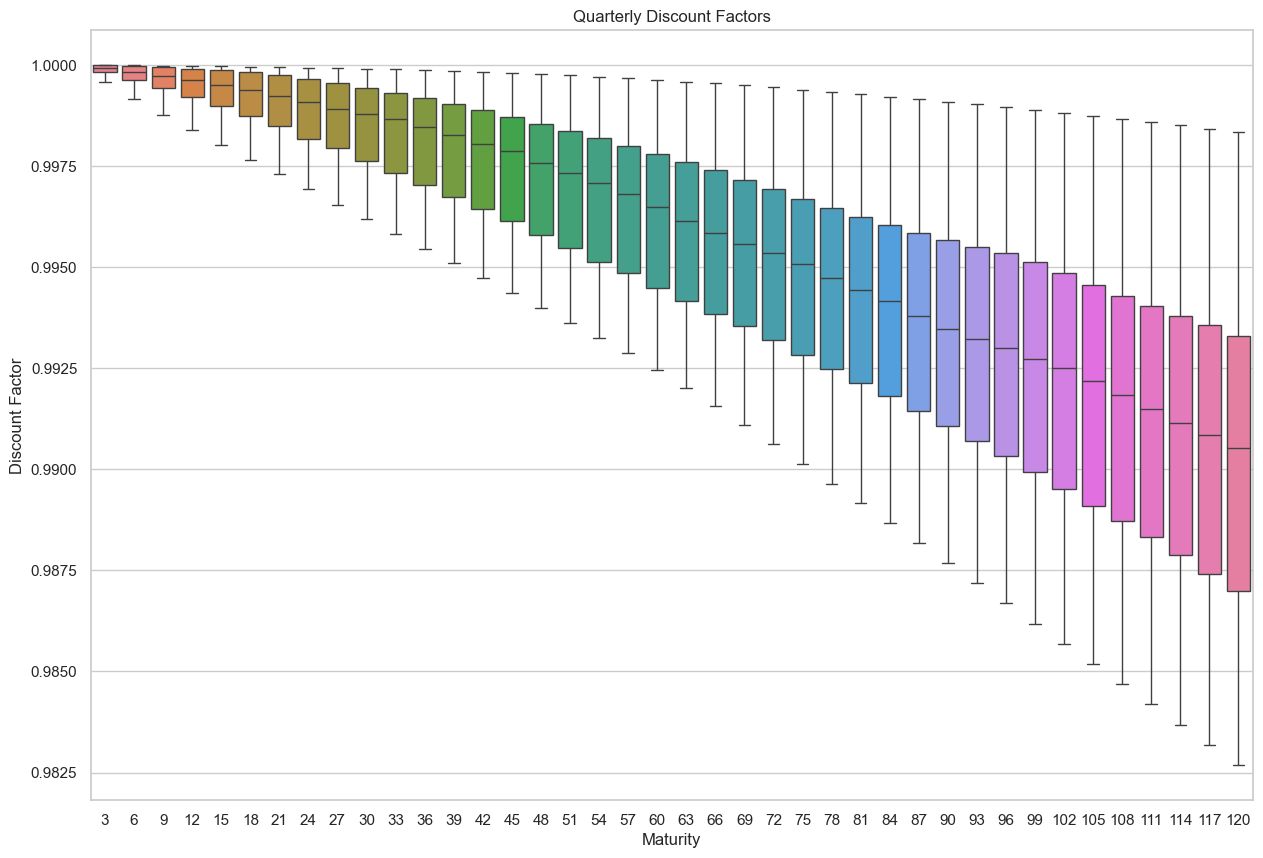

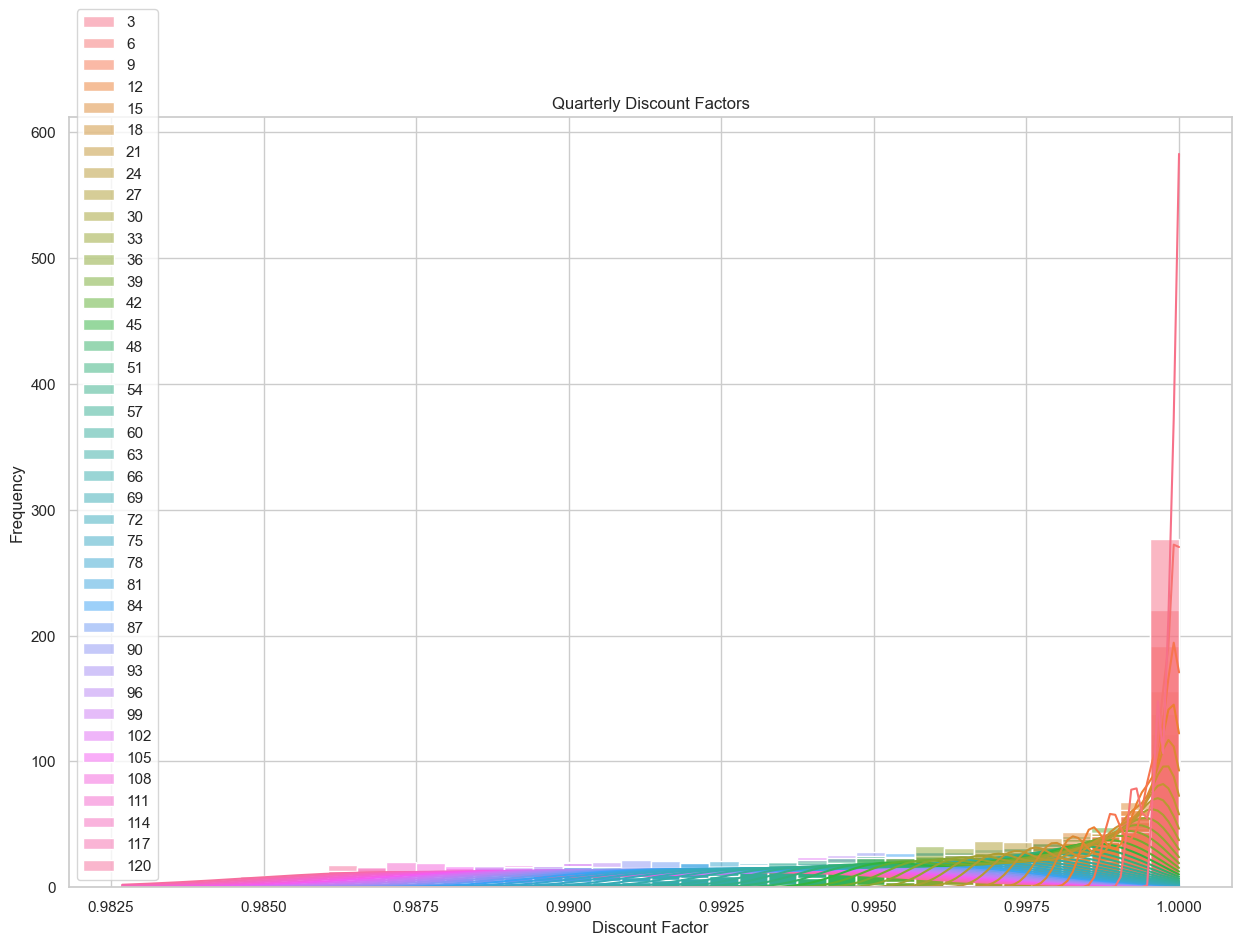

              3           6           9           12          15          18   \
count  277.000000  277.000000  277.000000  277.000000  277.000000  277.000000   
mean     0.999884    0.999753    0.999615    0.999477    0.999332    0.999180   
std      0.000129    0.000260    0.000384    0.000497    0.000606    0.000715   
min      0.999581    0.999170    0.998770    0.998386    0.998018    0.997666   
25%      0.999822    0.999631    0.999432    0.999214    0.998988    0.998752   
50%      0.999928    0.999838    0.999741    0.999628    0.999517    0.999382   
75%      0.999993    0.999978    0.999952    0.999917    0.999873    0.999823   
max      1.000000    0.999996    0.999989    0.999980    0.999969    0.999956   

              21          24          27          30   ...         93   \
count  277.000000  277.000000  277.000000  277.000000  ...  277.000000   
mean     0.999020    0.998851    0.998674    0.998489  ...    0.993098   
std      0.000823    0.000928    0.001029    0.0

In [2]:
start_date = '2001-01-02'
end_date = '2024-01-31'
plot_interest_rates(start_date=start_date, end_date=end_date)

### Credit default swaps (CDS) spread

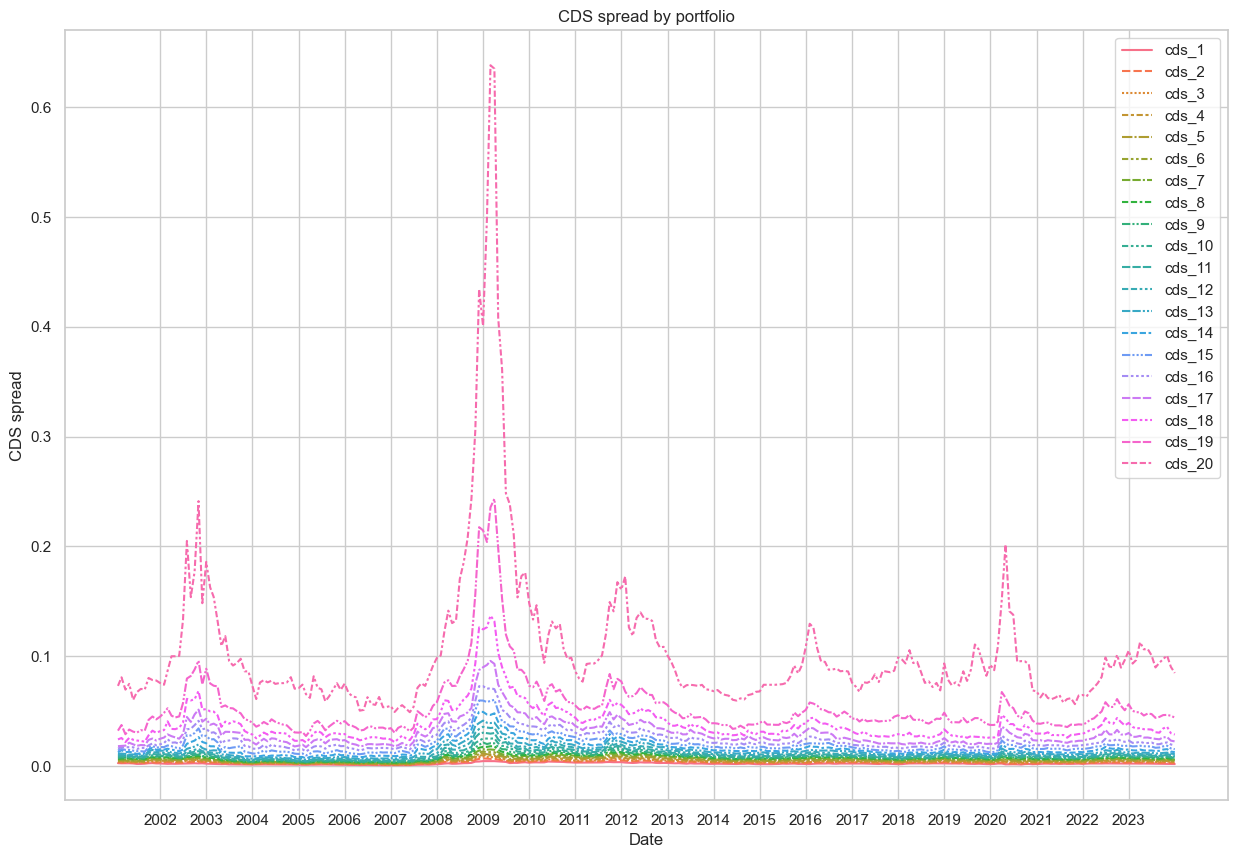

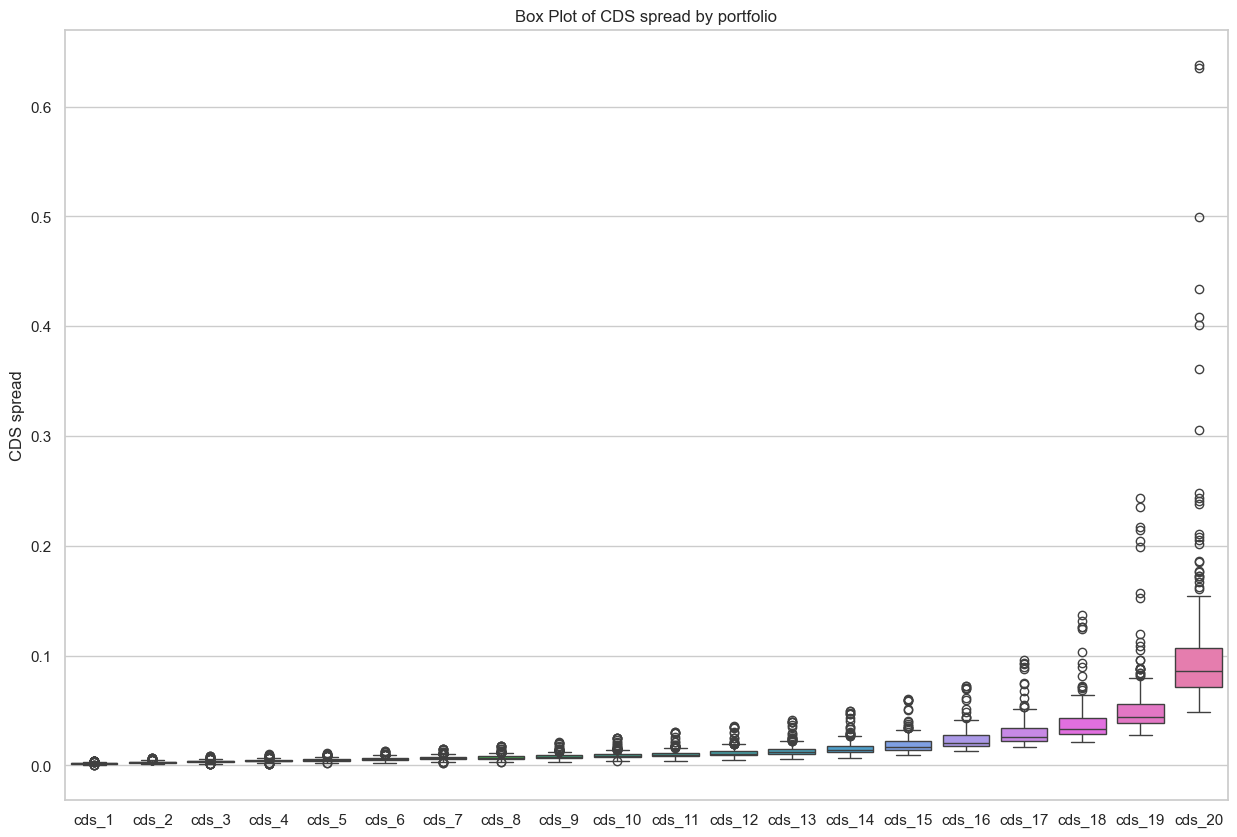

            cds_1       cds_2       cds_3       cds_4       cds_5       cds_6  \
count  276.000000  276.000000  276.000000  276.000000  276.000000  276.000000   
mean     0.002196    0.003099    0.003773    0.004429    0.005129    0.005838   
std      0.000768    0.001051    0.001275    0.001505    0.001764    0.002043   
min      0.000734    0.001067    0.001341    0.001622    0.001917    0.002258   
25%      0.001771    0.002524    0.003180    0.003756    0.004293    0.004879   
50%      0.002139    0.003002    0.003645    0.004288    0.004994    0.005670   
75%      0.002441    0.003505    0.004252    0.005003    0.005855    0.006649   
max      0.004500    0.006983    0.008767    0.009995    0.011750    0.013398   

            cds_7       cds_8       cds_9      cds_10      cds_11      cds_12  \
count  276.000000  276.000000  276.000000  276.000000  276.000000  276.000000   
mean     0.006592    0.007403    0.008270    0.009241    0.010376    0.011801   
std      0.002332    0.0027

In [3]:
cds_spread_plot(start_date=start_date, end_date=end_date)

# CDS returns estimation

In [4]:
start_date = '2001-01-02'
end_date = '2012-12-31'
returns_mean_2012 =calc_cds_return(start_date=start_date, end_date=end_date,Method ='mean')
returns_median_2012 =calc_cds_return(start_date=start_date, end_date=end_date,Method ='median')
returns_weighted_2012 =calc_cds_return(start_date=start_date, end_date=end_date,Method ='weighted')

In [5]:
start_date2 = '2013-01-02'
end_date2 = '2024-01-31'
returns_mean_2024 =calc_cds_return(start_date=start_date2, end_date=end_date2,Method ='mean')
returns_median_2024 =calc_cds_return(start_date=start_date2, end_date=end_date2,Method ='median')
returns_weighted_2024 =calc_cds_return(start_date=start_date2, end_date=end_date2,Method ='weighted')

In [6]:
real_returns = process_real_cds_return()
real_returns, returns_mean_2012 , diff_mean = calc_difference(returns_mean_2012, real_returns)
real_returns, returns_median_2012 , diff_median = calc_difference(returns_median_2012, real_returns)
real_returns, returns_weighted_2012 , diff_weighted = calc_difference(returns_weighted_2012, real_returns)

In [7]:
def plot_cds_returns_mean(start_date, end_date,Method='mean'):
    data = calc_cds_return(start_date, end_date,Method='mean')
    if data is None:
        print("No data available for the given date range.")
        return

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data)
    plt.title("Box Plot of CDS returns - mean method")
    plt.ylabel("Return (%)")
    plt.xticks(rotation=45)
    plt.show()

def plot_cds_returns_median(start_date, end_date,Method='median'):
    data = calc_cds_return(start_date, end_date,Method='median')
    if data is None:
        print("No data available for the given date range.")
        return

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data)
    plt.title("Box Plot of CDS returns - median method")
    plt.ylabel("Return (%)")
    plt.xticks(rotation=45)
    plt.show()

def plot_cds_returns_weighted(start_date, end_date,Method='weighted'):
    data = calc_cds_return(start_date, end_date,Method='weighted')
    if data is None:
        print("No data available for the given date range.")
        return

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data)
    plt.title("Box Plot of CDS returns - weighted method")
    plt.ylabel("Return (%)")
    plt.xticks(rotation=45)
    plt.show()


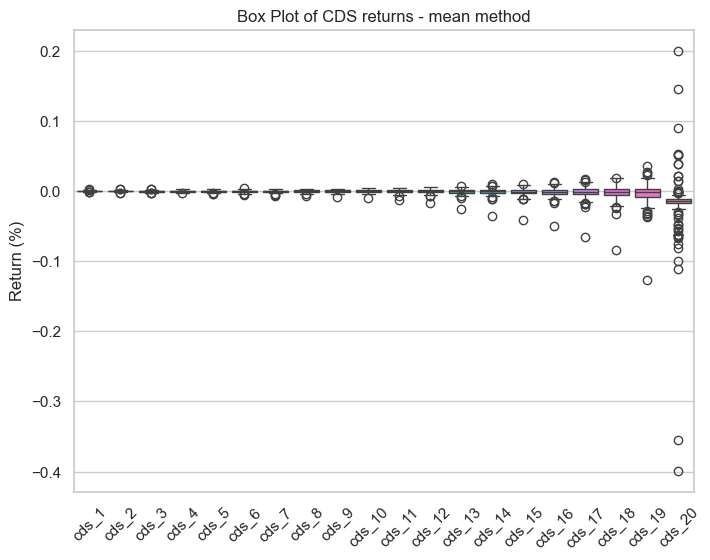

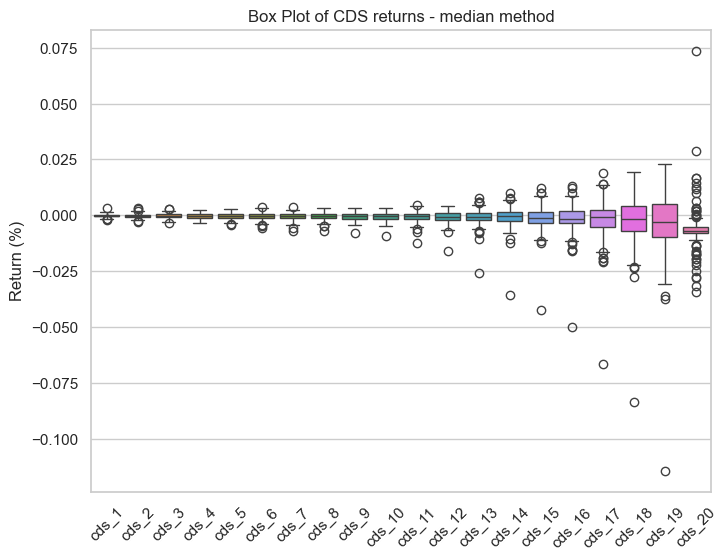

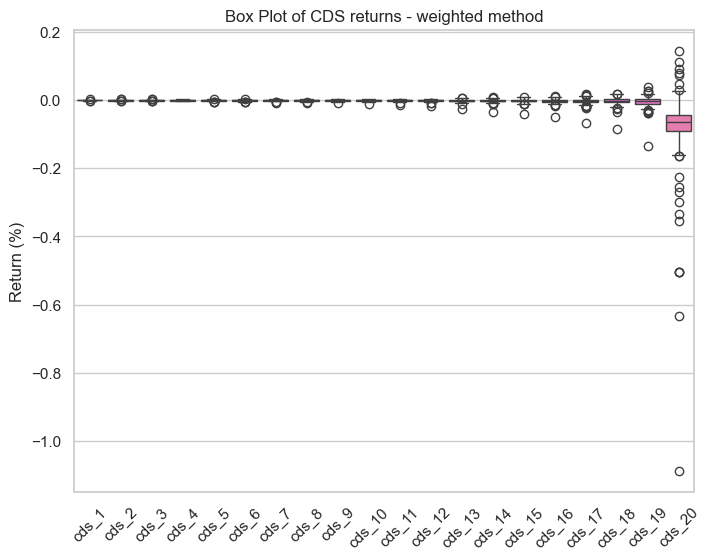

In [8]:
outsample_mean_plot = plot_cds_returns_mean(start_date2, end_date2,Method='mean')
outsample_median_plot = plot_cds_returns_median(start_date2, end_date2,Method='median')
outsample_weighted_plot = plot_cds_returns_weighted(start_date2, end_date2,Method='weighted')

In [11]:
def plot_cds_portfolio_returns(real_returns, returns_mean_2012, returns_median_2012, returns_weighted_2012, cds="cds_1"):
    """
    Plots a line graph of the returns from each of the provided DataFrames based on a specified CDS column name.
    
    Parameters:
    - real_returns (DataFrame): DataFrame containing actual returns indexed by date.
    - returns_mean_2012 (DataFrame): DataFrame containing mean returns for 2012 indexed by date.
    - returns_median_2012 (DataFrame): DataFrame containing median returns for 2012 indexed by date.
    - returns_weighted_2012 (DataFrame): DataFrame containing weighted returns for 2012 indexed by date.
    - cds (str): The column name representing the specific CDS to plot.
    """
    # Ensure the specified CDS column exists in all DataFrames
    for df in [real_returns, returns_mean_2012, returns_median_2012, returns_weighted_2012]:
        if cds not in df.columns:
            raise ValueError(f"Column {cds} not found in one of the DataFrames.")
    
    # Plotting
    plt.figure(figsize=(10, 6))
    
    # Plot each DataFrame's specified CDS returns
    plt.plot(real_returns.index, real_returns[cds], label='Real Returns')
    plt.plot(returns_mean_2012.index, returns_mean_2012[cds], label='Mean Returns 2012',linestyle='--')
    plt.plot(returns_median_2012.index, returns_median_2012[cds], label='Median Returns 2012', linestyle='-.')
    plt.plot(returns_weighted_2012.index, returns_weighted_2012[cds], label='Weighted Returns 2012', linestyle=':')
    
    # Labeling
    plt.title(f"Portfolio Returns Comparison for {cds}")
    plt.xlabel("Date")
    plt.ylabel("Returns")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show plot
    plt.show()

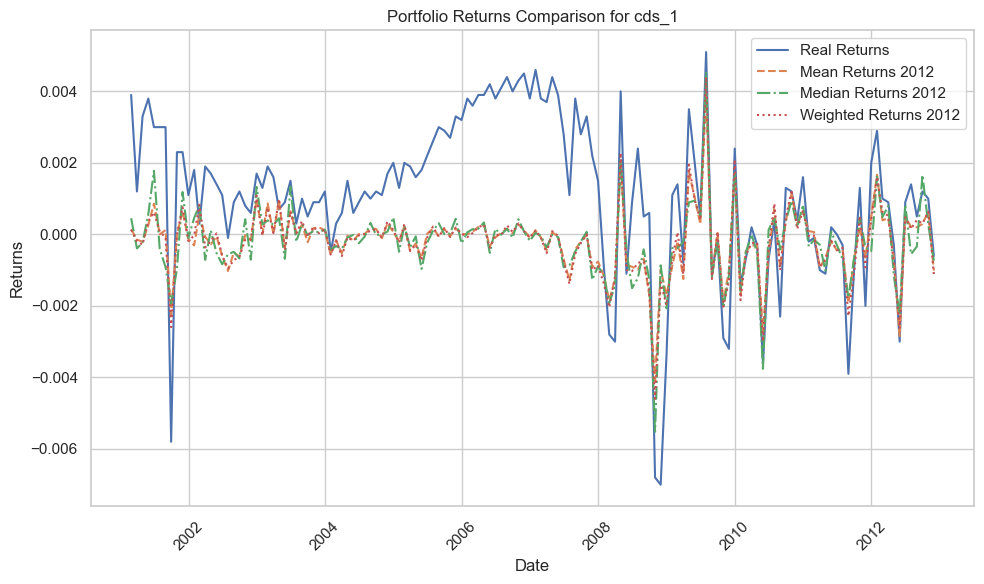

In [12]:
plot_cds_portfolio_returns(real_returns, returns_mean_2012, returns_median_2012, returns_weighted_2012, cds="cds_1")

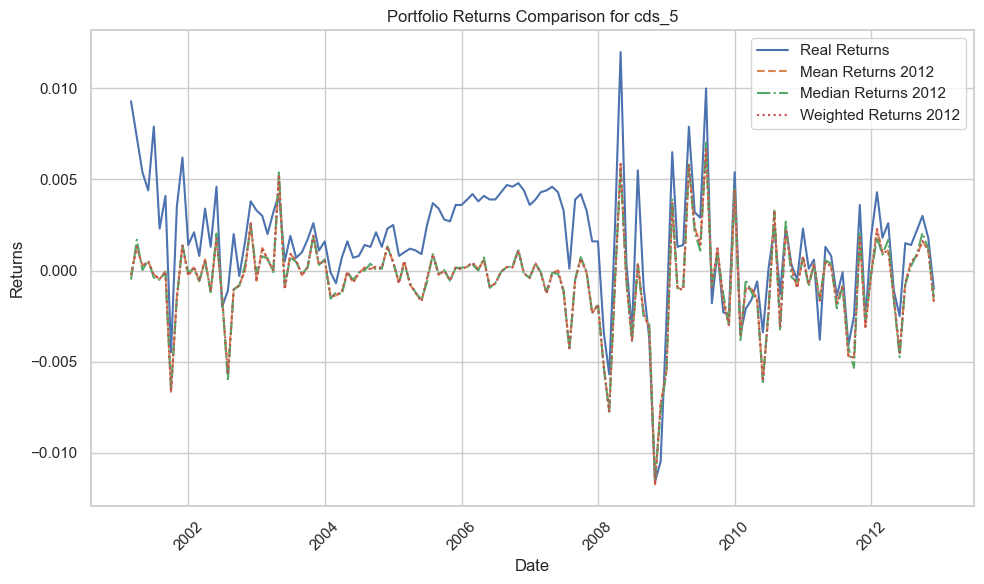

In [13]:
plot_cds_portfolio_returns(real_returns, returns_mean_2012, returns_median_2012, returns_weighted_2012, cds="cds_5")

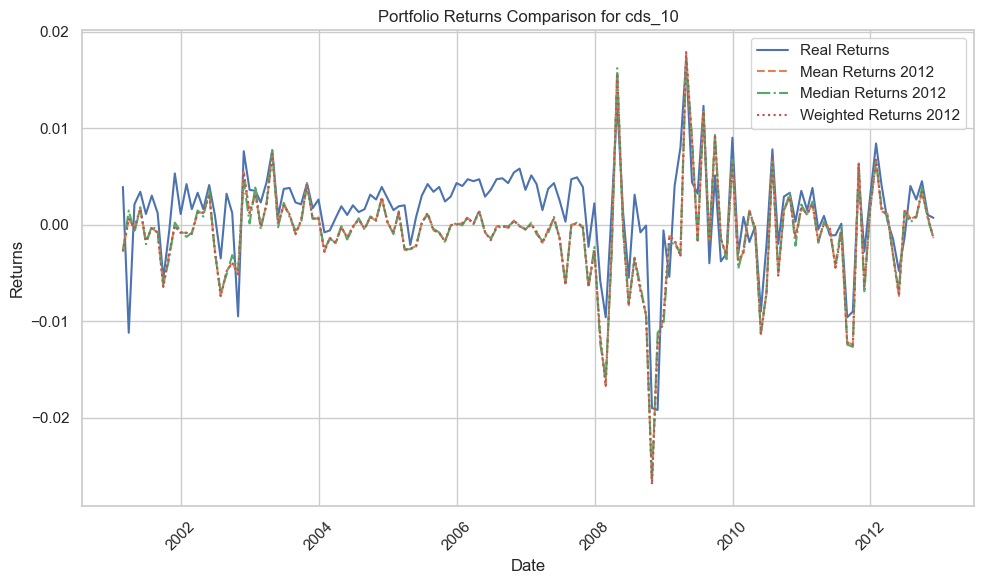

In [14]:
plot_cds_portfolio_returns(real_returns, returns_mean_2012, returns_median_2012, returns_weighted_2012, cds="cds_10")

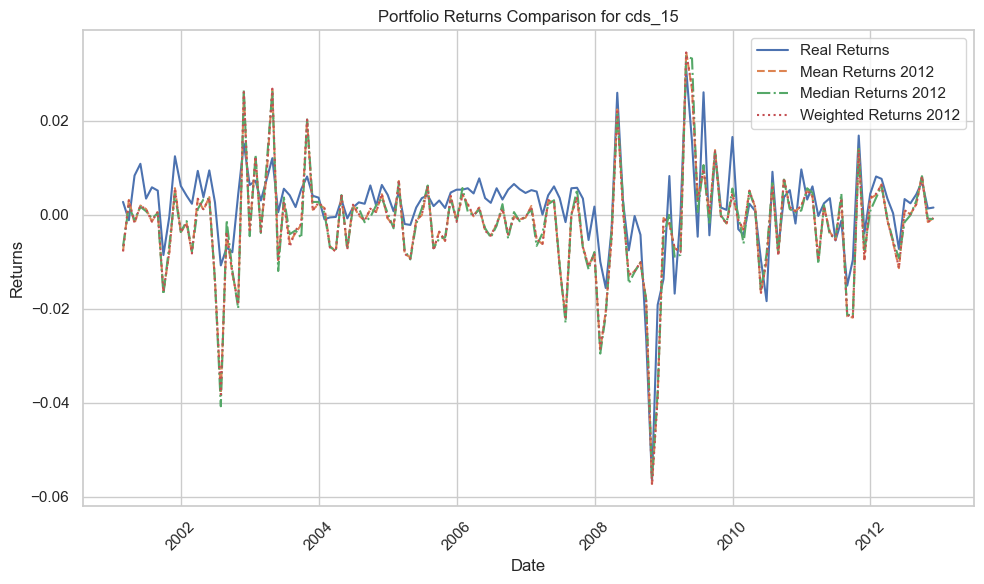

In [15]:
plot_cds_portfolio_returns(real_returns, returns_mean_2012, returns_median_2012, returns_weighted_2012, cds="cds_15")

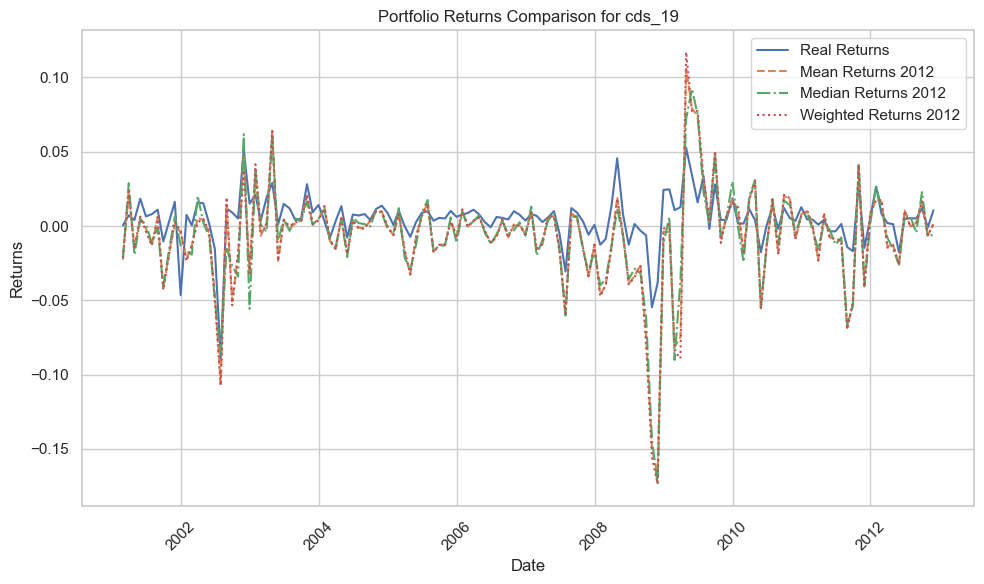

In [17]:
plot_cds_portfolio_returns(real_returns, returns_mean_2012, returns_median_2012, returns_weighted_2012, cds="cds_19")

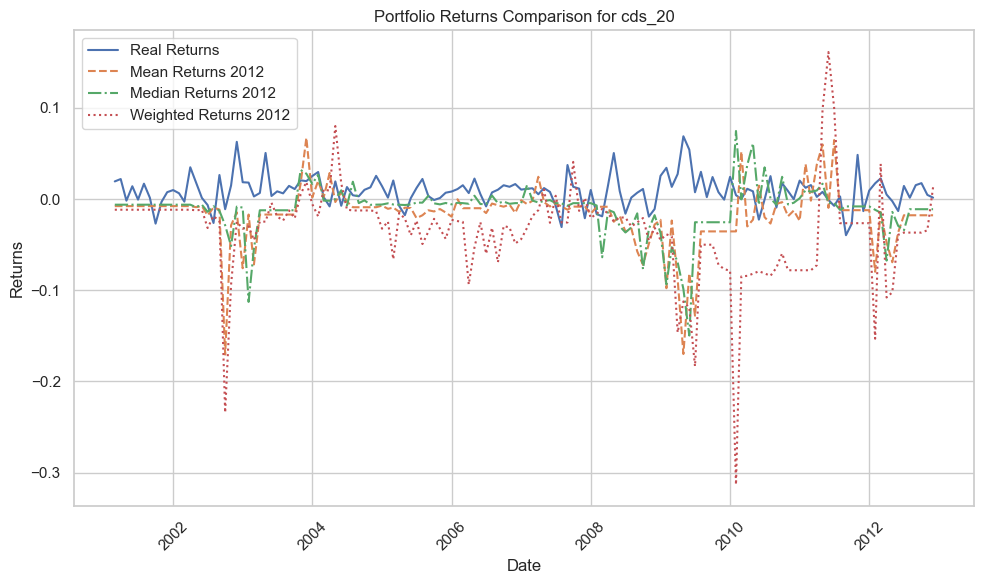

In [16]:
plot_cds_portfolio_returns(real_returns, returns_mean_2012, returns_median_2012, returns_weighted_2012, cds="cds_20")

### we see that from 2008 onwards the calculated returns are very similar to the actual returns except for cds_20 which is seems to be an outlier as this contains the highest of spreads, which can be very erratic. The treatment of this in the paper is unknown. Hence the diverging results.

## We check the difference between the actual and calculated returns using different methods. As seen from the below tables, the mean error for the total sample period is below 1% in most of the portfolios with max error in cds_19 and cds_20.

In [19]:
diff_mean.describe().T

count      mean       std       min       25%       50%       75%  \
cds_1   142.0  0.131895  0.174015 -0.602570  0.031562  0.118056  0.238268   
cds_2   142.0  0.164729  0.165486 -0.605289  0.046639  0.145086  0.283795   
cds_3   142.0  0.182425  0.158973 -0.416486  0.062619  0.156757  0.308232   
cds_4   142.0  0.180078  0.183808 -0.524444  0.053109  0.159193  0.307581   
cds_5   142.0  0.215181  0.189286 -0.316305  0.084318  0.187580  0.349955   
cds_6   142.0  0.212549  0.202146 -0.597190  0.093663  0.195832  0.352288   
cds_7   142.0  0.218828  0.201457 -0.495153  0.099167  0.210097  0.346936   
cds_8   142.0  0.258781  0.231711 -0.212746  0.113483  0.231862  0.396128   
cds_9   142.0  0.255057  0.268111 -0.482715  0.089296  0.218272  0.404964   
cds_10  142.0  0.241431  0.296461 -1.180370  0.105696  0.248349  0.406932   
cds_11  142.0  0.295494  0.369456 -1.544132  0.104333  0.319811  0.495795   
cds_12  142.0  0.299154  0.419095 -1.188803  0.088183  0.324794  0.479767   
cds_13  142.0  0.328331  0.444989 -1.789371  0.137523  0.343531  0.563149   
cds_14  142.0  0.377031  0.498804 -0.849003  0.081084  0.382547  0.685869   
cds_15  142.0  0.398709  0.655375 -1.451311  0.106396  0.399559  0.702352   
cds_16  142.0  0.546702  0.800430 -1.900870  0.129519  0.483736  0.987003   
cds_17  142.0  0.665219  0.959919 -2.802804  0.108376  0.551952  1.098790   
cds_18  142.0  0.796217  1.199674 -2.778748  0.187069  0.645519  1.298243   
cds_19  142.0  1.154988  2.355003 -5.808906  0.179776  0.951681  1.899466   
cds_20  142.0  2.577525  3.903272 -7.218474  1.123327  2.162023  3.500260   

              max  
cds_1    0.453165  
cds_2    0.466811  
cds_3    0.562258  
cds_4    0.624842  
cds_5    0.950558  
cds_6    0.898688  
cds_7    0.844370  
cds_8    1.082810  
cds_9    1.332931  
cds_10   1.118613  
cds_11   1.533940  
cds_12   2.690630  
cds_13   1.771873  
cds_14   1.957864  
cds_15   2.721077  
cds_16   3.413638  
cds_17   4.546524  
cds_18   6.245467  
cds_19  12.934900  
cds_20  23.884170

In [20]:
diff_median.describe().T

count      mean       std       min       25%       50%       75%  \
cds_1   142.0  0.132451  0.177816 -0.613538  0.019757  0.117430  0.261093   
cds_2   142.0  0.164487  0.169575 -0.592820  0.051609  0.144254  0.282755   
cds_3   142.0  0.182204  0.161589 -0.452281  0.063313  0.160020  0.311408   
cds_4   142.0  0.179809  0.185010 -0.512803  0.051807  0.169054  0.310045   
cds_5   142.0  0.214999  0.191852 -0.270943  0.088021  0.200370  0.344021   
cds_6   142.0  0.212590  0.204486 -0.659874  0.099981  0.202598  0.366092   
cds_7   142.0  0.218574  0.202586 -0.547167  0.101968  0.209766  0.353043   
cds_8   142.0  0.258712  0.232669 -0.274812  0.106153  0.232952  0.399584   
cds_9   142.0  0.255019  0.272175 -0.450510  0.090555  0.211043  0.416655   
cds_10  142.0  0.241077  0.304449 -1.266652  0.107318  0.251317  0.419655   
cds_11  142.0  0.295132  0.370531 -1.362291  0.075884  0.311414  0.488585   
cds_12  142.0  0.299099  0.419266 -1.247845  0.069674  0.297503  0.480774   
cds_13  142.0  0.328289  0.453233 -1.851112  0.110780  0.334226  0.579160   
cds_14  142.0  0.377041  0.532953 -0.947706  0.081516  0.385555  0.687362   
cds_15  142.0  0.398220  0.679425 -1.768915  0.035495  0.406567  0.736158   
cds_16  142.0  0.546473  0.814992 -1.901869  0.085780  0.467341  1.046285   
cds_17  142.0  0.665265  0.983120 -2.262094  0.046540  0.605739  1.065709   
cds_18  142.0  0.795715  1.247016 -2.906670  0.139256  0.632084  1.357965   
cds_19  142.0  1.142569  2.300859 -5.899766  0.079967  0.960756  1.918299   
cds_20  142.0  1.963887  3.431847 -7.039367  0.358791  1.499767  2.699051   

              max  
cds_1    0.471478  
cds_2    0.519483  
cds_3    0.541957  
cds_4    0.655771  
cds_5    0.980251  
cds_6    0.902233  
cds_7    0.813380  
cds_8    1.187522  
cds_9    1.439008  
cds_10   1.095216  
cds_11   1.629152  
cds_12   2.584576  
cds_13   1.817154  
cds_14   2.123978  
cds_15   2.995325  
cds_16   3.336266  
cds_17   4.462573  
cds_18   6.038072  
cds_19  13.571120  
cds_20  20.385381

In [21]:
diff_weighted.describe().T

count      mean       std        min       25%       50%       75%  \
cds_1   142.0  0.133386  0.170123  -0.565928  0.032655  0.120034  0.238343   
cds_2   142.0  0.164851  0.165255  -0.593170  0.046756  0.147717  0.284026   
cds_3   142.0  0.182527  0.158906  -0.411293  0.062138  0.156354  0.309064   
cds_4   142.0  0.180157  0.183898  -0.525294  0.052407  0.159532  0.308360   
cds_5   142.0  0.215294  0.189437  -0.319317  0.084434  0.187744  0.349892   
cds_6   142.0  0.212635  0.202275  -0.597344  0.092575  0.195345  0.349428   
cds_7   142.0  0.218911  0.201743  -0.496051  0.098465  0.211340  0.351041   
cds_8   142.0  0.258876  0.231776  -0.217900  0.113104  0.230853  0.396724   
cds_9   142.0  0.255158  0.268800  -0.482784  0.090910  0.217471  0.407589   
cds_10  142.0  0.241575  0.296746  -1.181728  0.104426  0.248305  0.405601   
cds_11  142.0  0.295653  0.370550  -1.546120  0.106893  0.317758  0.496097   
cds_12  142.0  0.299375  0.419496  -1.186433  0.090131  0.324237  0.484549   
cds_13  142.0  0.328674  0.447570  -1.802389  0.131327  0.345783  0.562350   
cds_14  142.0  0.377583  0.500505  -0.836109  0.089321  0.388859  0.689930   
cds_15  142.0  0.399739  0.661576  -1.477314  0.102295  0.387633  0.715779   
cds_16  142.0  0.547814  0.801627  -1.889236  0.120408  0.474800  0.999845   
cds_17  142.0  0.666644  0.969682  -2.867197  0.112571  0.564945  1.112787   
cds_18  142.0  0.800095  1.243707  -2.840590  0.178814  0.645412  1.283087   
cds_19  142.0  1.170768  2.500824  -6.449031  0.169943  0.948507  1.934515   
cds_20  142.0  4.354697  5.534119 -16.220149  1.757034  3.378301  7.258617   

              max  
cds_1    0.457281  
cds_2    0.467000  
cds_3    0.560810  
cds_4    0.622691  
cds_5    0.954664  
cds_6    0.896077  
cds_7    0.854070  
cds_8    1.082027  
cds_9    1.337941  
cds_10   1.131497  
cds_11   1.546472  
cds_12   2.681299  
cds_13   1.771124  
cds_14   2.006110  
cds_15   2.741878  
cds_16   3.416452  
cds_17   4.662531  
cds_18   6.528961  
cds_19  13.509228  
cds_20  31.754397

## We check the performance metrics from 2008 onwards and compare to the actual returns, as from the above graphs give the most accurate prediction

In [29]:
returns_mean_2008_2012 = returns_mean_2012[(returns_mean_2012.index >= '2008-01-01') & (returns_mean_2012.index <= '2012-12-31')]
returns_median_2008_2012 = returns_median_2012[(returns_median_2012.index >= '2008-01-01') & (returns_median_2012.index <= '2012-12-31')]
returns_weighted_2008_2012 = returns_weighted_2012[(returns_weighted_2012.index >= '2008-01-01') & (returns_weighted_2012.index <= '2012-12-31')]

In [31]:
returns_real_2008_2012 = real_returns[(real_returns.index >= '2008-01-01') & (real_returns.index <= '2012-12-31')]

In [33]:
## calculating the return difference in this time frame

returns_real_2008_2012, returns_mean_2008_2012 , diff_mean_2008_2012 = calc_difference(returns_mean_2008_2012, returns_real_2008_2012,)
returns_real_2008_2012, returns_median_2008_2012 , diff_median_2008_2012 = calc_difference(returns_median_2008_2012, returns_real_2008_2012,)
returns_real_2008_2012, returns_weighted_2008_2012 , diff_weighted_2008_2012 = calc_difference(returns_weighted_2008_2012, returns_real_2008_2012,)

In [34]:
diff_mean_2008_2012.describe().T

count      mean       std       min       25%       50%       75%  \
cds_1    59.0  0.013396  0.139660 -0.602570 -0.027056  0.030088  0.095547   
cds_2    59.0  0.050043  0.134500 -0.605289  0.016935  0.045674  0.114171   
cds_3    59.0  0.081618  0.132950 -0.416486  0.027023  0.065940  0.138726   
cds_4    59.0  0.077112  0.157802 -0.524444  0.014356  0.060533  0.179788   
cds_5    59.0  0.111467  0.151484 -0.316305  0.038434  0.092983  0.204528   
cds_6    59.0  0.132601  0.217640 -0.597190  0.051466  0.137185  0.221360   
cds_7    59.0  0.143190  0.202215 -0.495153  0.060346  0.130830  0.257042   
cds_8    59.0  0.175342  0.268172 -0.212746  0.003350  0.130775  0.259107   
cds_9    59.0  0.184418  0.316836 -0.317702 -0.013050  0.109935  0.271010   
cds_10   59.0  0.179881  0.348803 -0.709736  0.018758  0.167011  0.339150   
cds_11   59.0  0.199793  0.476498 -1.544132 -0.063387  0.169256  0.437951   
cds_12   59.0  0.250204  0.523579 -0.931009  0.052052  0.161687  0.404979   
cds_13   59.0  0.238990  0.568691 -1.789371 -0.030688  0.222442  0.528254   
cds_14   59.0  0.242734  0.535871 -0.807039 -0.069999  0.212505  0.514064   
cds_15   59.0  0.236595  0.660857 -1.297255 -0.110896  0.223847  0.568515   
cds_16   59.0  0.481133  0.606035 -0.800861  0.132670  0.391378  0.875509   
cds_17   59.0  0.617040  1.026736 -0.985237  0.012044  0.402751  0.852183   
cds_18   59.0  0.814072  1.473640 -2.778748  0.070723  0.522957  1.476898   
cds_19   59.0  1.365192  3.268286 -5.808906 -0.454669  0.898764  2.637403   
cds_20   59.0  3.432550  5.068792 -7.218474  1.603390  3.111769  5.221284   

              max  
cds_1    0.338507  
cds_2    0.325575  
cds_3    0.403709  
cds_4    0.559928  
cds_5    0.615080  
cds_6    0.898688  
cds_7    0.715797  
cds_8    1.082810  
cds_9    1.332931  
cds_10   1.118613  
cds_11   1.533940  
cds_12   2.690630  
cds_13   1.771873  
cds_14   1.661891  
cds_15   1.933240  
cds_16   1.847737  
cds_17   4.546524  
cds_18   6.245467  
cds_19  12.934900  
cds_20  23.884170

In [35]:
diff_median_2008_2012.describe().T

count      mean       std       min       25%       50%       75%  \
cds_1    59.0  0.014453  0.143295 -0.613538 -0.052332  0.016119  0.083538   
cds_2    59.0  0.049821  0.137885 -0.592820  0.005933  0.051283  0.121563   
cds_3    59.0  0.081111  0.135223 -0.452281  0.023486  0.075271  0.142601   
cds_4    59.0  0.076487  0.158510 -0.512803  0.006939  0.059143  0.178079   
cds_5    59.0  0.110859  0.154677 -0.270943  0.033225  0.092213  0.206950   
cds_6    59.0  0.132851  0.226514 -0.659874  0.012092  0.140917  0.224224   
cds_7    59.0  0.142843  0.207440 -0.547167  0.054097  0.154853  0.255774   
cds_8    59.0  0.175109  0.270701 -0.274812  0.013091  0.117277  0.270244   
cds_9    59.0  0.184692  0.328538 -0.347949 -0.002180  0.108922  0.253064   
cds_10   59.0  0.180419  0.356220 -0.800834  0.039432  0.165677  0.345823   
cds_11   59.0  0.199727  0.479241 -1.362291 -0.064265  0.178251  0.427208   
cds_12   59.0  0.251529  0.519660 -0.928252  0.031082  0.206503  0.396942   
cds_13   59.0  0.241222  0.579256 -1.851112 -0.055373  0.231725  0.515105   
cds_14   59.0  0.242641  0.582527 -0.912299 -0.151088  0.183202  0.498425   
cds_15   59.0  0.236086  0.665379 -1.768915 -0.091552  0.216723  0.585056   
cds_16   59.0  0.482311  0.661708 -0.949311  0.088601  0.353030  0.929848   
cds_17   59.0  0.614948  1.052323 -1.185860 -0.067969  0.482453  0.949612   
cds_18   59.0  0.807190  1.469229 -2.906670 -0.035785  0.645718  1.384379   
cds_19   59.0  1.334908  3.127178 -5.899766 -0.328717  0.908582  2.653212   
cds_20   59.0  2.608190  4.592556 -7.039367  0.148905  1.940633  4.173036   

              max  
cds_1    0.362106  
cds_2    0.347095  
cds_3    0.375700  
cds_4    0.529207  
cds_5    0.644895  
cds_6    0.902233  
cds_7    0.744337  
cds_8    1.187522  
cds_9    1.439008  
cds_10   1.095216  
cds_11   1.629152  
cds_12   2.584576  
cds_13   1.817154  
cds_14   1.884444  
cds_15   1.955146  
cds_16   2.104243  
cds_17   4.063559  
cds_18   6.038072  
cds_19  13.571120  
cds_20  20.385381

In [36]:
diff_weighted_2008_2012.describe().T

count      mean       std        min       25%       50%       75%  \
cds_1    59.0  0.015066  0.128516  -0.565928 -0.023440  0.031006  0.081685   
cds_2    59.0  0.050341  0.133219  -0.593170  0.015303  0.044308  0.116197   
cds_3    59.0  0.081774  0.132666  -0.411293  0.026076  0.064159  0.137985   
cds_4    59.0  0.077259  0.158114  -0.525294  0.015089  0.058053  0.181028   
cds_5    59.0  0.111691  0.151640  -0.319317  0.038762  0.091698  0.204301   
cds_6    59.0  0.132711  0.217774  -0.597344  0.049454  0.137960  0.221788   
cds_7    59.0  0.143327  0.202565  -0.496051  0.061006  0.131200  0.256857   
cds_8    59.0  0.175485  0.268381  -0.217900  0.001008  0.128102  0.261954   
cds_9    59.0  0.184529  0.318064  -0.320209 -0.014323  0.106685  0.268272   
cds_10   59.0  0.180083  0.349118  -0.686174  0.017571  0.166830  0.340491   
cds_11   59.0  0.199789  0.477963  -1.546120 -0.062760  0.166912  0.436954   
cds_12   59.0  0.249772  0.523182  -0.949148  0.052354  0.164793  0.417076   
cds_13   59.0  0.239095  0.570944  -1.802389 -0.034988  0.209089  0.522720   
cds_14   59.0  0.243252  0.535364  -0.782188 -0.067902  0.220558  0.519693   
cds_15   59.0  0.237170  0.665352  -1.292516 -0.116214  0.220925  0.578285   
cds_16   59.0  0.481699  0.605626  -0.785917  0.130585  0.391314  0.877582   
cds_17   59.0  0.619582  1.045911  -0.986524 -0.009730  0.407699  0.860162   
cds_18   59.0  0.820929  1.547307  -2.840590  0.058823  0.506800  1.413140   
cds_19   59.0  1.393891  3.488821  -6.449031 -0.504040  0.920311  2.620436   
cds_20   59.0  6.019985  7.182594 -16.220149  2.915235  6.599821  8.858867   

              max  
cds_1    0.319710  
cds_2    0.323131  
cds_3    0.397966  
cds_4    0.559329  
cds_5    0.615047  
cds_6    0.896077  
cds_7    0.713601  
cds_8    1.082027  
cds_9    1.337941  
cds_10   1.131497  
cds_11   1.546472  
cds_12   2.681299  
cds_13   1.771124  
cds_14   1.676401  
cds_15   1.979006  
cds_16   1.843535  
cds_17   4.662531  
cds_18   6.528961  
cds_19  13.509228  
cds_20  31.754397

## CDS returns from 2012 onwards

In [48]:
def plot_cds_portfolio_returns(returns_mean_2024, returns_median_2024, returns_weighted_2024, cds="cds_1"):
    """
    Plots a line graph of the returns from each of the provided DataFrames based on a specified CDS column name.
    
    Parameters:
    - real_returns (DataFrame): DataFrame containing actual returns indexed by date.
    - returns_mean_2012 (DataFrame): DataFrame containing mean returns for 2012 indexed by date.
    - returns_median_2012 (DataFrame): DataFrame containing median returns for 2012 indexed by date.
    - returns_weighted_2012 (DataFrame): DataFrame containing weighted returns for 2012 indexed by date.
    - cds (str): The column name representing the specific CDS to plot.
    """
    # Ensure the specified CDS column exists in all DataFrames
    for df in [returns_mean_2024, returns_median_2024, returns_weighted_2024]:
        if cds not in df.columns:
            raise ValueError(f"Column {cds} not found in one of the DataFrames.")
    
    # Plotting
    plt.figure(figsize=(10, 6))
    
    # Plot each DataFrame's specified CDS returns
    plt.plot(returns_mean_2024.index, returns_mean_2024[cds], label='Mean Returns 2013-24',linestyle='--')
    plt.plot(returns_median_2024.index, returns_median_2024[cds], label='Median Returns 2013-24', linestyle='-.')
    plt.plot(returns_weighted_2024.index, returns_weighted_2024[cds], label='Weighted Returns 2013-24', linestyle=':')
    
    # Labeling
    plt.title(f"Portfolio Returns Comparison for {cds}")
    plt.xlabel("Date")
    plt.ylabel("Returns")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show plot
    plt.show()

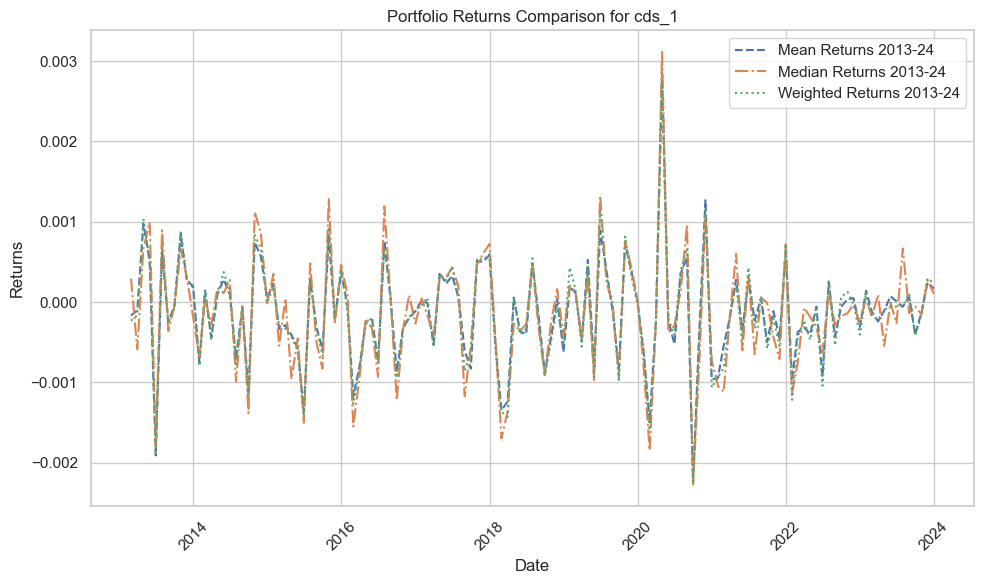

In [49]:
plot_cds_portfolio_returns(returns_mean_2024, returns_median_2024, returns_weighted_2024, cds="cds_1")

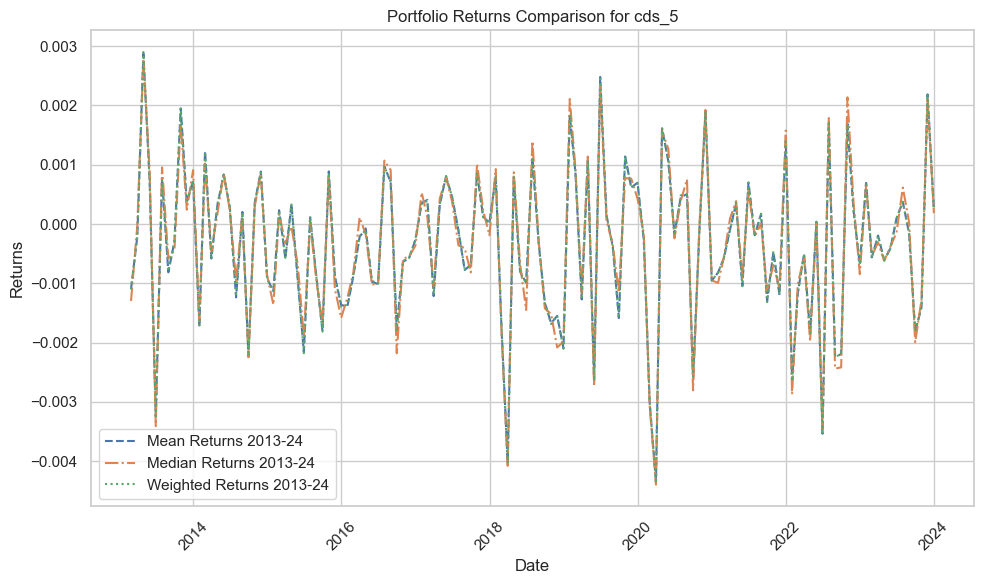

In [50]:
plot_cds_portfolio_returns(returns_mean_2024, returns_median_2024, returns_weighted_2024, cds="cds_5")

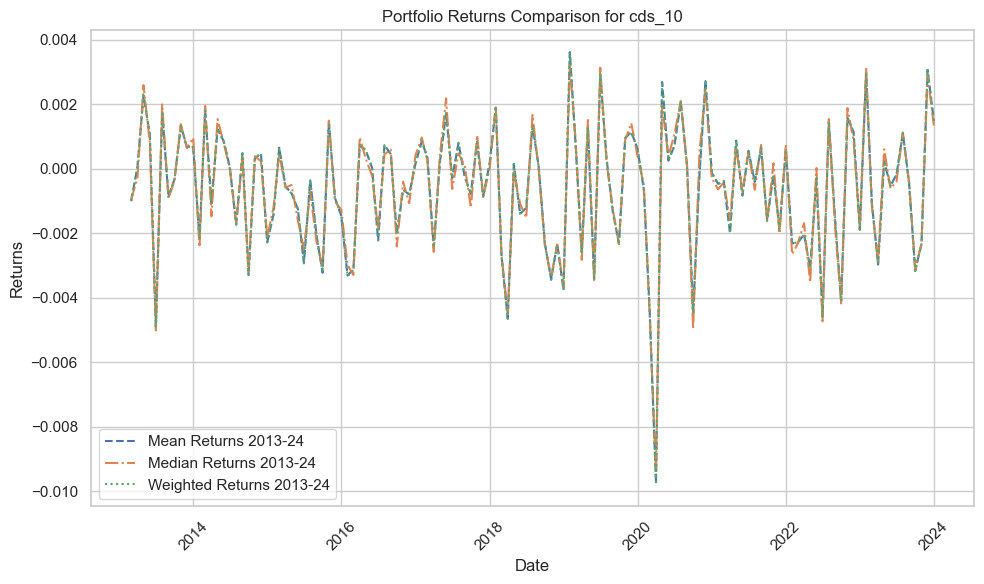

In [51]:
plot_cds_portfolio_returns(returns_mean_2024, returns_median_2024, returns_weighted_2024, cds="cds_10")

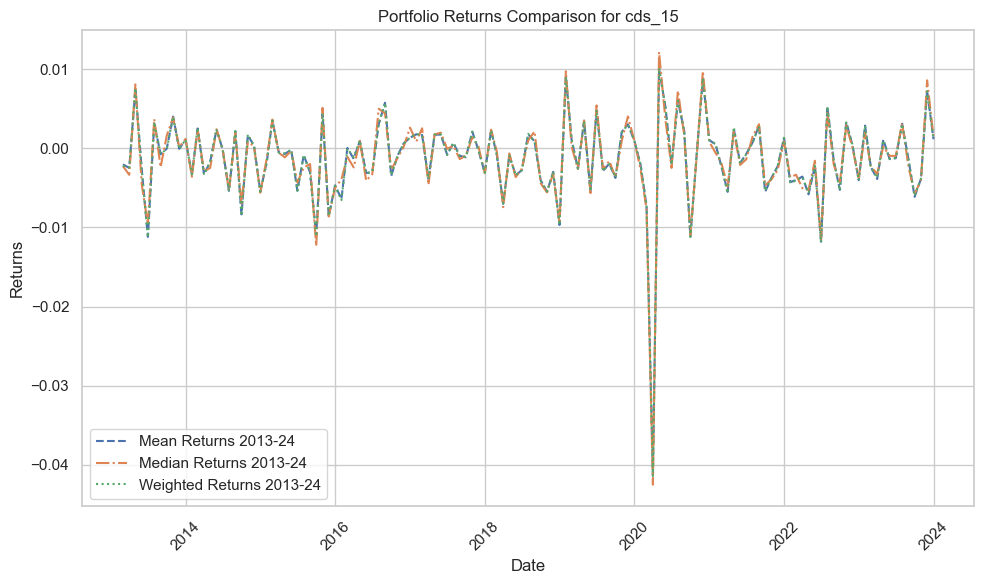

In [52]:
plot_cds_portfolio_returns(returns_mean_2024, returns_median_2024, returns_weighted_2024, cds="cds_15")

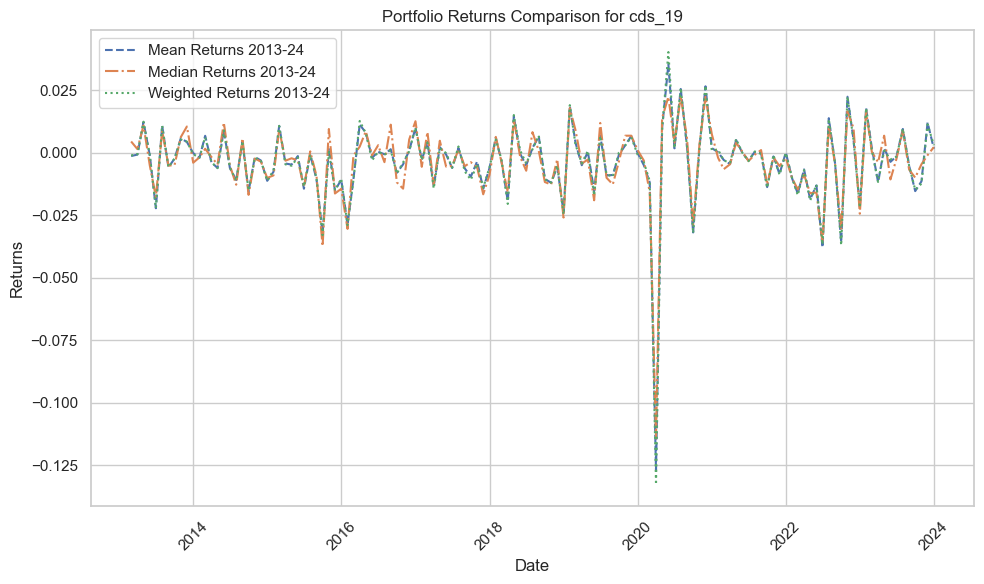

In [53]:
plot_cds_portfolio_returns(returns_mean_2024, returns_median_2024, returns_weighted_2024, cds="cds_19")

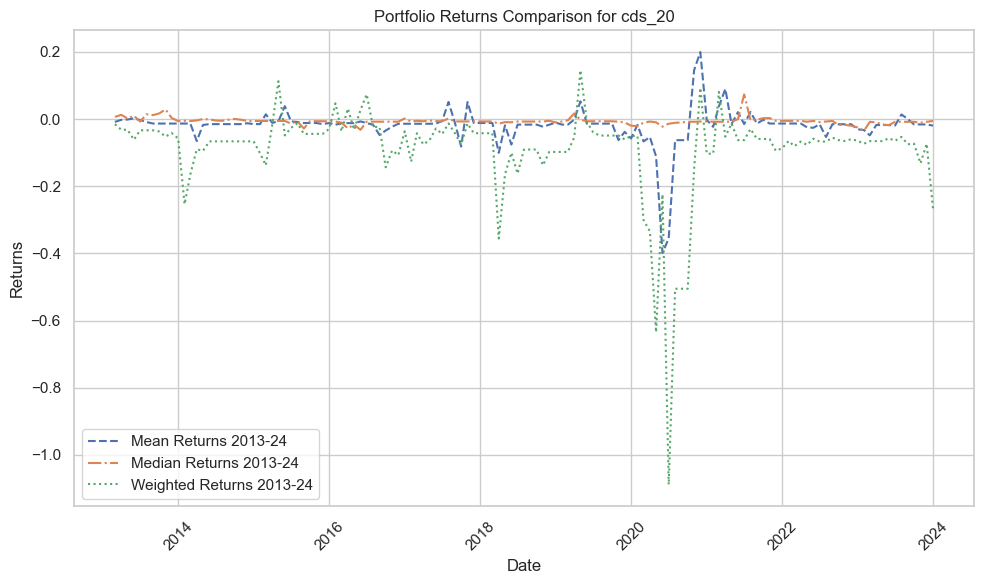

In [54]:
plot_cds_portfolio_returns(returns_mean_2024, returns_median_2024, returns_weighted_2024, cds="cds_20")